<a href="https://colab.research.google.com/github/Vixuz144/Admin-Prod/blob/main/Segundo_examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import pandas as pd

#Previsiones

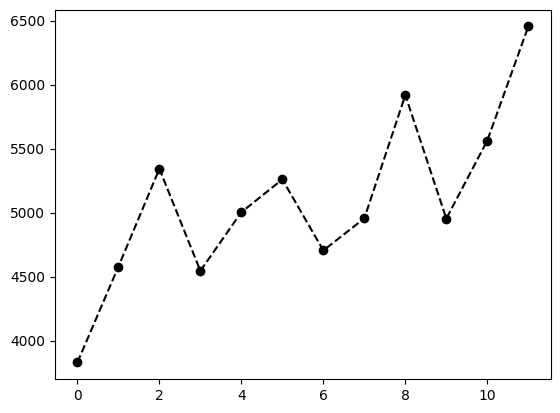

In [2]:
date = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
y0 = np.array([3829, 4577, 5342, 4545, 5003, 5259, 4704, 4955, 5918, 4953, 5563, 6454])
x0 = np.arange(len(y0))

plt.plot(x0,y0, 'o--', color = 'black')
plt.show()

##Regresión lineal

Coeficiente R^2 = 0.5698360918118104
Suma del absoluto de los residuales = 4580.111888111887
Previsión regresión lineal = 6028.01515151515


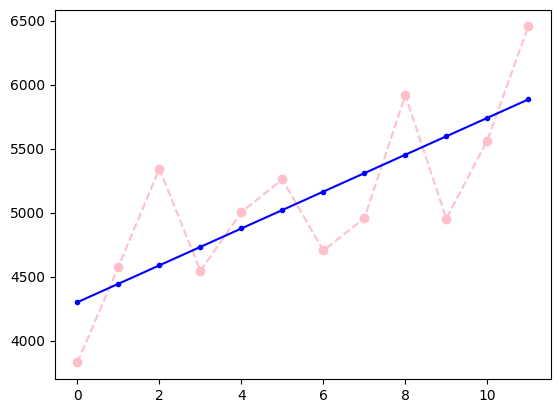

In [3]:
x, y = x0, y0

med = np.mean(y)
desv = np.std(y, ddof = 1)


c = 2.5
a = y <= med - c*desv
b = y >= med + c*desv

x = x.tolist()
y = y.tolist()

n = list(a | b).count(True)
for i in range(n):
  k = list(a | b).index(True)
  y.pop(k)
  x.pop(k)
  a = np.array(y) <= med - c*desv
  b = np.array(y) >= med + c*desv

reg = ss.linregress(x,y)
a = reg.slope
b = reg.intercept
y_rl = a*np.array(x) + b

print(f'Coeficiente R^2 = {reg.rvalue**2}')
# print(f'Residuales: {np.array(y) - y_rl}')
# print(f'Valor absoluto de los residuales: {abs(np.array(y) - y_rl)}')

res_rl = f'Suma del absoluto de los residuales = {sum(abs(np.array(y) - y_rl))}'
print(res_rl)
coef_rl = sum(abs(np.array(y) - y_rl)) / len(y_rl)
coef_rl = f'Coeficiente de ajuste regresión lineal {coef_rl}'

prev_rl = f'Previsión regresión lineal = {a*12 + b}'
print(prev_rl)

plt.plot(x,y, 'o--', color = 'pink')
plt.plot(x,y_rl, '.-', color = 'blue')
plt.show()

##Medias móviles

Suma del absoluto de los residuales = 5447.0
Previsión medias móviles = 5563.0


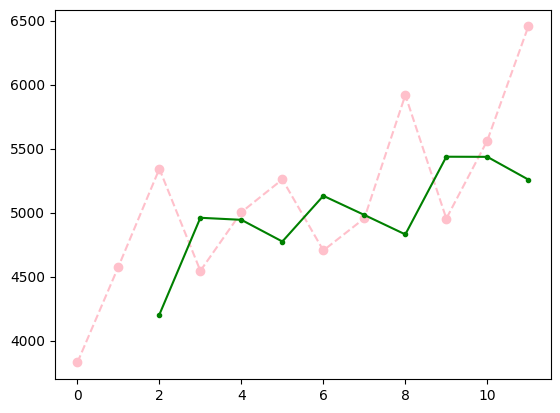

In [4]:
x,y = x0, y0

lag = 2

x_mm = x[lag:]
y_ob = y[lag:]
y_mm = []

n = len(y)
for i in range(n - lag):
  y_mm.append(y[i:i+lag].mean())

res_mm = f'Suma del absoluto de los residuales = {sum(abs(y_ob - y_mm))}'
print(res_mm)
coef_mm = sum(abs(y_ob - y_mm)) / len(y_mm)
coef_mm = f'Coeficiente de ajuste medias móviles {coef_mm}'

prev_mm = f'Previsión medias móviles = {y[-2:-1].mean()}'
print(prev_mm)

plt.plot(x,y, 'o--', color = 'pink')
plt.plot(x_mm,y_mm, '.-', color = 'g')
plt.show()

##Medias ponderadas

Suma del absoluto de los residuales = 5375.0
Previsión medias ponderadas = 5919.4


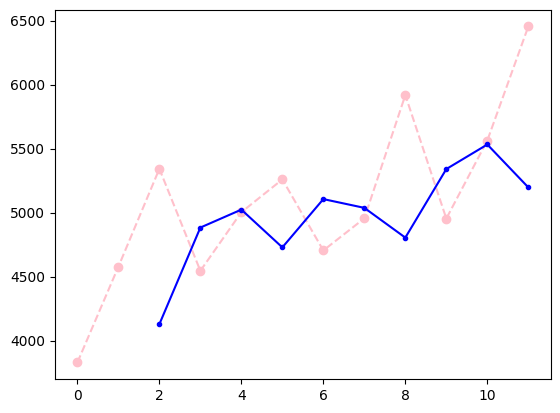

In [5]:
x,y = x0, y0
pr = 0.60
p = [pr,1-pr]
lag = len(p)

x_mv = x[lag:]
y_ob = y[lag:]
y_mv = []

n = len(y)
for i in range(n - lag):
  s = 0
  for j in range(lag):
    s += y[i + j] * p[j]
  y_mv.append(s)

res_mv = f'Suma del absoluto de los residuales = {sum(abs(y_ob - y_mv))}'
print(res_mv)
coef_mv = sum(abs(y_ob - y_mv)) / len(y_mv)
coef_mv = f'Coeficiente de ajuste medias ponderadas {coef_mv}'

prev_mv = f'Previsión medias ponderadas = {y[-2] * p[0] + y[-1] * p[1]}'
print(prev_mv)

plt.plot(x,y, 'o--', color = 'pink')
plt.plot(x_mv,y_mv, '.-', color = 'b')
plt.show()

##Suavización exponencial simple

Suma del absoluto de los residuales = 7436.348972151139
Previsión suavización exponencial = 5510.66715529226


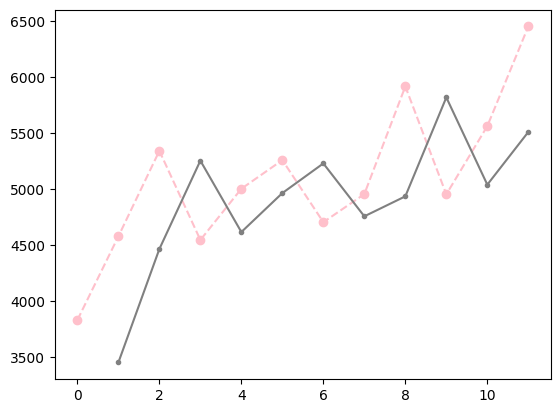

In [6]:
x,y = x0, y0
se = [35]
a = 0.9
n = len(y)
for i in range(n):
  se.append(se[i] + a * (y[i] - se[i]))

x_se = x[1:]
y_ob = y[1:]

y_se = se[1:-1]

res_se = f'Suma del absoluto de los residuales = {sum(abs(y_ob - y_se))}'
print(res_se)
coef_se = sum(abs(y_ob - y_se)) / len(y_se)
coef_se = f'Coeficiente de ajuste suavización exponencial {coef_se}'

prev_se = f'Previsión suavización exponencial = {y_se[-1]}'
print(prev_se)

plt.plot(x,y, 'o--', color = 'pink')
plt.plot(x_se,y_se, '.-', color = 'gray')
plt.show()

##Regresión polinómica

Suma del absoluto de los residuales = 3314.0253080252987
Previsión ajuste polinomial = 7235.494949494954


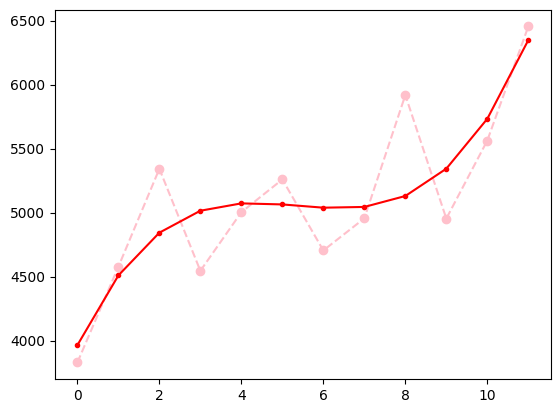

In [7]:
x_obs = np.transpose([np.ones(len(x)), x, x**2, x**3])
y_obs = np.transpose([y])


xx = np.transpose(x_obs).dot(x_obs).astype(float)
yy = np.transpose(x_obs).dot(y_obs).astype(float)

beta = np.linalg.solve(xx,yy.T[0])

# print(beta)
# for i in range(5):
#   print(sum(beta*[1, i, i**2]))

y_est = np.dot(x_obs,beta)

res_pol = f'Suma del absoluto de los residuales = {sum(abs(y - y_est))}'
print(res_pol)
coef_pol = sum(abs(y - y_est)) / len(y_est)
coef_pol = f'Coeficiente de ajuste polinomial {coef_pol}'

c = 12
prev_pol = f'Previsión ajuste polinomial = {np.dot(beta, np.array([1, c, c**2, c**3]))}'
print(prev_pol)

plt.plot(x,y_obs, 'o--', color = 'pink')
plt.plot(x,y_est, '.-', color = 'r')
plt.show()

##Comparación de métodos

In [8]:
print(coef_rl)
print(coef_mm)
print(coef_mv)
print(coef_se)
print(coef_pol)

texto = f'\nComo se puede apreciar por las gráficas y el coeficiente de ajuste, \nlos modelos que mejor se ajustan son el modelo polinomial y el modelo lineal.\n{prev_rl}\n{prev_pol}'
print(texto)

sol1 = res_rl + '\n' + res_mm + '\n' + res_mv + '\n' + res_se + '\n' + res_pol + '\n'
sol1 += '\n' + coef_rl + '\n' + coef_mm + '\n' + coef_mv + '\n' + coef_se + '\n' + coef_pol + '\n'
sol1 += '\n' + prev_rl + '\n' + prev_mm + '\n' + prev_mv + '\n' + prev_se + '\n' + prev_pol + '\n'
sol1 += '\n' + texto
# print(sol1)

Coeficiente de ajuste regresión lineal 381.6759906759906
Coeficiente de ajuste medias móviles 544.7
Coeficiente de ajuste medias ponderadas 537.5
Coeficiente de ajuste suavización exponencial 676.0317247410126
Coeficiente de ajuste polinomial 276.1687756687749

Como se puede apreciar por las gráficas y el coeficiente de ajuste, 
los modelos que mejor se ajustan son el modelo polinomial y el modelo lineal.
Previsión regresión lineal = 6028.01515151515
Previsión ajuste polinomial = 7235.494949494954


#Inventarios

In [9]:
def met_ABC(data, a, b, c):
  data.sort(reverse = True)
  s = sum(data)
  x = np.array(data)
  p = x/s

  pa, tipo = [], []
  for i in range(len(p)):
    pr = sum(p[:i+1])
    pa.append(pr)
    if pr <= a:
      tipo.append('A')
    elif pr <= b:
      tipo.append('B')
    else:
      tipo.append('C')
  return x, p, pa, tipo

In [10]:
def graf_ABC(data, prob_ac, tipo):
  c = []
  for i in range(len(tipo)):
    if tipo[i] == 'A':
      c.append('g')
    elif tipo[i] == 'B':
      c.append('orange')
    else:
      c.append('r')

  d = np.array(data) / 1000
  eje = d.astype(str)

  fig, ax = plt.subplots()
  ax.bar(eje, x, color = c)
  ax2 = ax.twinx()
  plt.ylim(0,1.05)
  ax2.plot(eje, prob_ac, 'o-' ,color = 'c')

  plt.title('Gráfica de Pareto Metodo ABC')
  plt.xlabel('Costo, miles')
  plt.savefig("Graf_ABC.png", format = 'png', dpi = 144)
  plt.show()

In [11]:
def resumen_tipo(data, prob, tipo):
  sa, sb, sc = 0, 0, 0
  ma, mb, mc = 0, 0, 0
  pa, pb, pc = 0, 0, 0
  for i in range(len(tipo)):
    if tipo[i] == 'A':
      sa+=1
      ma+=data[i]
      pa+=prob[i]
    elif tipo[i] == 'B':
      sb+=1
      mb+=data[i]
      pb+=prob[i]
    else:
      sc+=1
      mc+=data[i]
      pc+=prob[i]

  ls = [sa/(sa+sb+sc), sb/(sa+sb+sc), sc/(sa+sb+sc)]
  lm = [ma, mb, mc]
  lp = [pa, pb, pc]

  r = [np.round(lm), np.round(ls,5), np.round(lp,5)]
  r = pd.DataFrame(np.transpose(r), index = ['A','B','C'], columns = ["Valor monetario", "Porcentaje", "Porcentaje monetario"])
  return r

    Costo Porcentaje Acumulado Clasificacion
0  912000    0.54125   0.54125             A
1  150000    0.08902   0.63027             A
2  136000    0.08071   0.71098             A
3  118000    0.07003   0.78101             A
4   97000    0.05757   0.83858             B
5   85000    0.05045   0.88902             B
6   66000    0.03917   0.92819             B
7   65000    0.03858   0.96677             C
8   32000    0.01899   0.98576             C
9   24000    0.01424       1.0             C 



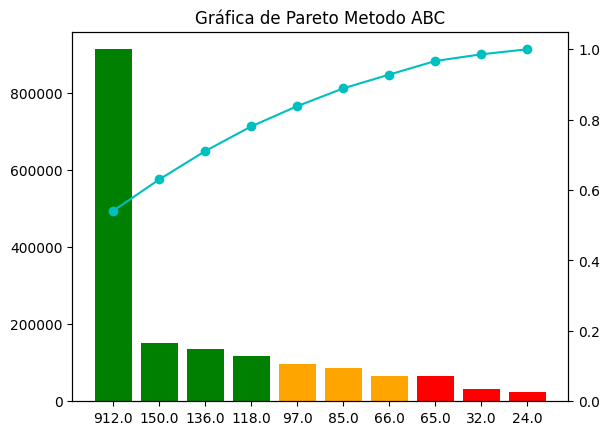

   Valor monetario  Porcentaje  Porcentaje monetario
A        1316000.0         0.4               0.78101
B         248000.0         0.3               0.14718
C         121000.0         0.3               0.07181


In [12]:
x = [32000, 150000, 65000, 912000, 136000, 118000, 85000, 97000, 24000, 66000]
x, p, a, tipo = met_ABC(x, 0.80, 0.96, 1.00)

t = [x,np.round(p, 5),np.round(a, 5),tipo]
t = pd.DataFrame(np.transpose(t), columns = ['Costo', 'Porcentaje', 'Acumulado', 'Clasificacion'])

print(t,'\n')

graf_ABC(x,a,tipo)

r = resumen_tipo(x,p,tipo)
sol2 = 'a)\n' + t.to_string() + '\n\nb)\n' + r.to_string()
print(r)

In [13]:
def lote2(Q, co, ca):
  q = np.sqrt(2 * Q * co/ca)

  can_ped = Q/q

  cost_a = q / 2 * ca
  cost_o = can_ped * co
  cost_t = cost_o + cost_a
  return q, can_ped, cost_a, cost_o, cost_t

In [14]:
cu = 200
co = 5000
ca = 50
print(x[:4])
sol2 += 'c)'
for k in x[:4]:
  Q = k / cu
  # print(Q)
  q, c, a, o, ct = lote2(Q, co, ca)

  cosa = f"Lote económico = {round(q, 2)}\n   Cantidad de ordenes = {round(c)}\n   Costo anual de almacenamiento = {round(a,2)}\n   Costo anual de orden = {round(o,2)}\n   Costo anual total = {round(ct,2)}"
  sol2 += f"\n\nPara {k} \n" + cosa
  print(cosa)

[912000 150000 136000 118000]
Lote económico = 954.99
   Cantidad de ordenes = 5
   Costo anual de almacenamiento = 23874.67
   Costo anual de orden = 23874.67
   Costo anual total = 47749.35
Lote económico = 387.3
   Cantidad de ordenes = 2
   Costo anual de almacenamiento = 9682.46
   Costo anual de orden = 9682.46
   Costo anual total = 19364.92
Lote económico = 368.78
   Cantidad de ordenes = 2
   Costo anual de almacenamiento = 9219.54
   Costo anual de orden = 9219.54
   Costo anual total = 18439.09
Lote económico = 343.51
   Cantidad de ordenes = 2
   Costo anual de almacenamiento = 8587.78
   Costo anual de orden = 8587.78
   Costo anual total = 17175.56


#Solucion

In [15]:
texto = open("Resultados Segundo Examen.txt", "w")

texto.write('1.- ')
texto.write(sol1)

texto.write('\n\n\n2.- ')
texto.write(sol2)

texto.close()